In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(42)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

This imports the libraries we need to start visualizing the data and sets our random seed at 42. 

In [2]:
ames_training_data = pd.read_csv('../datasets/train.csv')

This imports the ames training data set.

In [3]:
ames_training_data.shape

(2051, 81)

From first glance, we can see that we have 2051 observations with 81 features each. 

In [4]:
ames_training_data.isnull().sum().sort_values(ascending=False)

Pool QC            2042
Misc Feature       1986
Alley              1911
Fence              1651
Fireplace Qu       1000
Lot Frontage        330
Garage Finish       114
Garage Cond         114
Garage Qual         114
Garage Yr Blt       114
Garage Type         113
Bsmt Exposure        58
BsmtFin Type 2       56
BsmtFin Type 1       55
Bsmt Cond            55
Bsmt Qual            55
Mas Vnr Type         22
Mas Vnr Area         22
Bsmt Half Bath        2
Bsmt Full Bath        2
Garage Cars           1
Garage Area           1
Bsmt Unf SF           1
BsmtFin SF 2          1
Total Bsmt SF         1
BsmtFin SF 1          1
Overall Cond          0
Exterior 2nd          0
Exterior 1st          0
Roof Matl             0
                   ... 
Heating               0
Exter Cond            0
TotRms AbvGrd         0
Yr Sold               0
Mo Sold               0
Misc Val              0
Pool Area             0
Screen Porch          0
3Ssn Porch            0
Enclosed Porch        0
Open Porch SF   

There are 28 columns with some amount of null values. I will now manually impute the null values according to the Ames Data Dictionary.

In [5]:
na_replacement_values = {
    'Pool QC'   : 'No pool',         
    'Misc Feature' : 'No feature',      
    'Alley'         : 'No alley access',    
    'Fence'          : 'No fence',   
    'Fireplace Qu'    : 'No Fireplace',  
    'Lot Frontage'  : 0,
    'Garage Finish'  : 'No Garage'   ,  
    'Garage Cond'     : 'No Garage'  , 
    'Garage Qual'      : 'No Garage',  
    'Garage Yr Blt'  : 0,
    'Garage Type'     : 'No Garage',   
    'Bsmt Exposure'    : 'No Basement',   
    'BsmtFin Type 2'    : 'No Basement',  
    'BsmtFin Type 1'     : 'No Basement',
    'Bsmt Cond'           : 'No Basement',
    'Bsmt Qual'            : 'No Basement',
    'Mas Vnr Type'         : 'None',
    'Mas Vnr Area'         : 0,
    'Bsmt Half Bath'        : 'No Basement',
    'Bsmt Full Bath'        : 'No Basement',
    'Garage Cars'           : 0,
    'Garage Area'           : 0,
    'Bsmt Unf SF'           : 0,
    'BsmtFin SF 2'          : 0,
    'Total Bsmt SF'         : 0,
    'BsmtFin SF 1'          : 0,                        
}

In [6]:
ames_training_data.fillna(value=na_replacement_values,inplace=True)

I have now replaced every null value in the ames training dataset with an appropriate value instead. 

In [7]:
neighborhood_replacement_values = {
       'Blmngtn': 'Bloomington Heights',
       'Blueste': 'Bluestem',
       'BrDale': 'Briardale',
       'BrkSide': 'Brookside',
       'ClearCr': 'Clear Creek',
       'CollgCr': 'College Creek',
       'Crawfor': 'Crawford',
       'Edwards': 'Edwards',
       'Gilbert': 'Gilbert',
       'Greens': 'Greens',
       'GrnHill': 'Green Hills',
       'IDOTRR': 'Iowa DOT and Rail Road',
       'Landmrk': 'Landmark',
       'MeadowV': 'Meadow Village',
       'Mitchel': 'Mitchell',
       'Names': 'North Ames',
       'NoRidge': 'Northridge',
       'NPkVill': 'Northpark Villa',
       'NridgHt': 'Northridge Heights',
       'NWAmes': 'Northwest Ames',
       'OldTown': 'Old Town',
       'SWISU': 'South & West of Iowa State University',
       'Sawyer': 'Sawyer',
       'SawyerW': 'Sawyer West',
       'Somerst': 'Somerset',
       'StoneBr': 'Stone Brook',
       'Timber': 'Timberland',
       'Veenker': 'Veenker'
}

In [8]:
ames_training_data['Neighborhood'].replace(neighborhood_replacement_values,inplace=True)

I have now replaced all of the ames training data neighborhood name abbreviations in order to make them more human readable. 

In [9]:
ms_subclass_replacement_values = {
       20 :'1-STORY 1946 & NEWER ALL STYLES',
       30 : '1-STORY 1945 & OLDER',
       40 : '1-STORY W/FINISHED ATTIC ALL AGES',
       45 : '1-1/2 STORY - UNFINISHED ALL AGES',
       50 : '1-1/2 STORY FINISHED ALL AGES',
       60 : '2-STORY 1946 & NEWER',
       70 : '2-STORY 1945 & OLDER',
       75 : '2-1/2 STORY ALL AGES',
       80 : 'SPLIT OR MULTI-LEVEL',
       85 : 'SPLIT FOYER',
       90 : 'DUPLEX - ALL STYLES AND AGES',
       120 : '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150 : '1-1/2 STORY PUD - ALL AGES',
       160 : '2-STORY PUD - 1946 & NEWER',
       180 : 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190 : '2 FAMILY CONVERSION - ALL STYLES AND AGES',

    
}

In [10]:
ames_training_data['MS SubClass'].replace(ms_subclass_replacement_values, inplace = True)

I am replacing the MS SubClass abbreviations to make them more human readable.

In [11]:
ms_zoning_replacement_values = {
       'A' : 'Agriculture',
       'C' : 'Commercial',
       'FV' : 'Floating Village Residential',
       'I' : 'Industrial',
       'RH' : 'Residential High Density',
       'RL' : 'Residential Low Density',
       'RP' : 'Residential Low Density Park', 
       'RM' : 'Residential Medium Density'
}

In [12]:
ames_training_data['MS Zoning'].replace(ms_zoning_replacement_values, inplace = True)

I am replacing the MS Zoning abbreviations to make them more human readable. 

In [13]:
month_replacement_values = {
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December',
}

In [14]:
ames_training_data['Mo Sold'].replace(month_replacement_values, inplace = True)

In [15]:
ames_training_data['Mo Sold'] = ames_training_data['Mo Sold'].astype('object')
ames_training_data['Yr Sold'] = ames_training_data['Yr Sold'].astype('object')
ames_training_data['Full Bath'] = ames_training_data['Full Bath'].astype('object')
ames_training_data['Half Bath'] = ames_training_data['Half Bath'].astype('object')
ames_training_data['Exter Qual'] = ames_training_data['Exter Qual'].astype('object')
ames_training_data['Exter Cond'] = ames_training_data['Exter Cond'].astype('object')
ames_training_data['Overall Qual'] = ames_training_data['Overall Qual'].astype('object')
ames_training_data['Overall Cond'] = ames_training_data['Overall Cond'].astype('object')
ames_training_data['Garage Cars'] = ames_training_data['Garage Cars'].astype('object')
ames_training_data['Bedroom AbvGr'] = ames_training_data['Bedroom AbvGr'].astype('object')
ames_training_data['Kitchen AbvGr'] = ames_training_data['Kitchen AbvGr'].astype('object')
ames_training_data['TotRms AbvGrd'] = ames_training_data['TotRms AbvGrd'].astype('object')
ames_training_data['Fireplaces'] = ames_training_data['Fireplaces'].astype('object')



I am converting the categorical numerical data into objects.

In [16]:
ames_training_data.drop(['Garage Yr Blt'], axis=1,inplace = True)
ames_training_data.drop(['Fireplaces'], axis=1,inplace = True)

I am dropping the Garage Yr Blt column, as it is extraneous. Additionally, I am dropping Pool QC, Misc Feature, Alley, Fence, and Fireplace Qu as they all have a very large number of null values. 

In [17]:
ames_training_data['Overall Qual'].replace([1, 2, 3], 'Bad',inplace = True)
ames_training_data['Overall Qual'].replace([4, 5, 6, 7], 'Good',inplace = True)
ames_training_data['Overall Qual'].replace([8, 9, 10], 'Excellent',inplace = True)

ames_training_data['Overall Cond'].replace([1, 2, 3], 'Bad',inplace = True)
ames_training_data['Overall Cond'].replace([4, 5, 6,7], 'Good',inplace = True)
ames_training_data['Overall Cond'].replace([8, 9, 10], 'Excellent',inplace = True)

This takes the categorical variables of Overall Qual and Overall Cond and converts them into three distinct categories. 

# Exploratory Data Analysis

First, I will split the ames training data columns up into categorical and numerical columns. 

In [18]:
ames_training_data_categorical = ames_training_data.select_dtypes(include = ['object'])

In [19]:
ames_training_data_numerical = ames_training_data.select_dtypes(exclude = ['object'])

# I will now make scatterplots of the relevant numerical data.

I'd like to see which sale prices are the most common amongst the training data I've been given. 

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Sale Price vs Frequency')

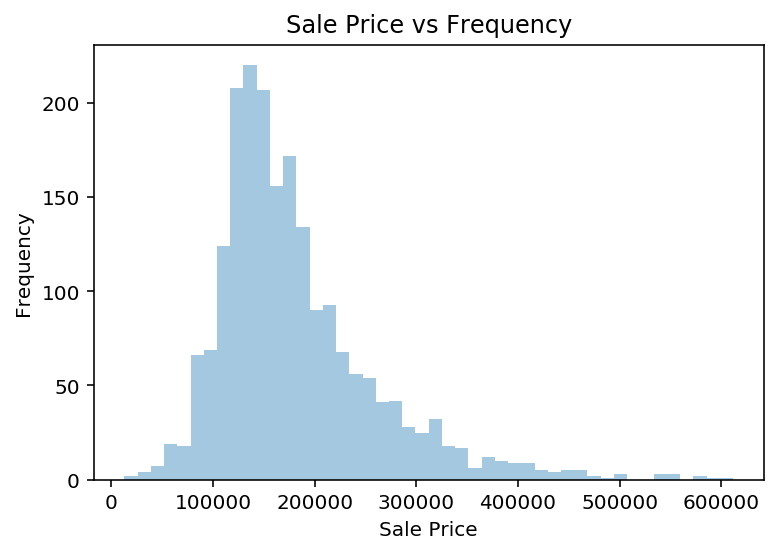

In [20]:
sns.distplot(ames_training_data['SalePrice'],kde = False)
plt.ylabel("Frequency")
plt.xlabel("Sale Price")
plt.title("Sale Price vs Frequency")

As you can see from the histogram of the sale price relative to the number of houses, the distribution peaks at somewhere around 125,000 dollars. Additionally, there are some houses going for 500,000 dollars and above that are skewing the distibution to the right. 

Additionally, I'd like to see how lot frontage can be used to predict Sales Price. 

Text(0.5, 1.0, 'Lot Frontage vs Sale Price')

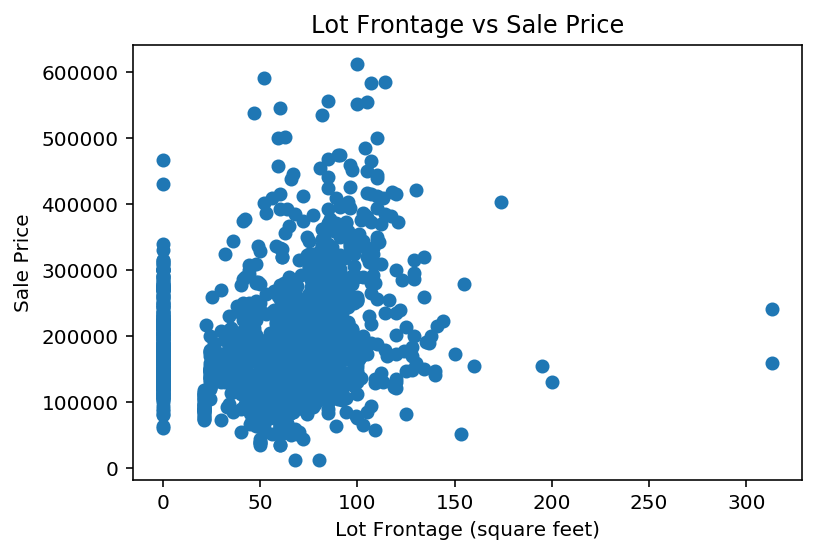

In [21]:
plt.scatter(ames_training_data['Lot Frontage'],ames_training_data['SalePrice'])
plt.ylabel("Sale Price")
plt.xlabel("Lot Frontage (square feet)")
plt.title("Lot Frontage vs Sale Price")

From cleaning the ames training data, we can see that there are roughly 330 homes out of the 2051, or 16 percent, that have no lot frontage. Additionally, there is a roughly positive correlation between lot frontage and sales price. There are a couple of outliers that have more than 300 square feet of lot footage, yet remain under 300,000 dollars in price.

Along those same lines, I'd like to see how lot frontage can be used to predict Sales Price. 

Text(0.5, 0, 'Lot Area (square feet)')

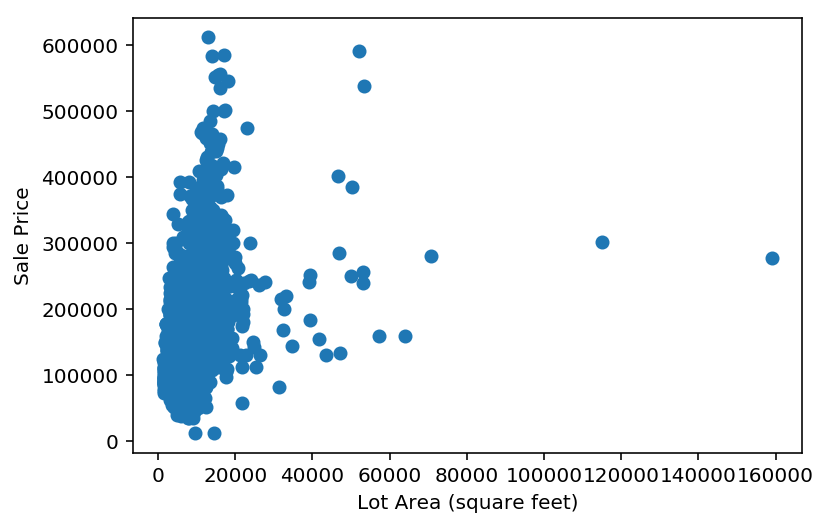

In [22]:
plt.scatter(ames_training_data['Lot Area'],ames_training_data['SalePrice'])
plt.ylabel("Sale Price")
plt.xlabel("Lot Area (square feet)")

There are 

I believe that the more recently a home was built, the higher it's Sale Price will be, since it will have more modern features. 

Text(0.5, 1.0, 'Year Built vs Sale Price')

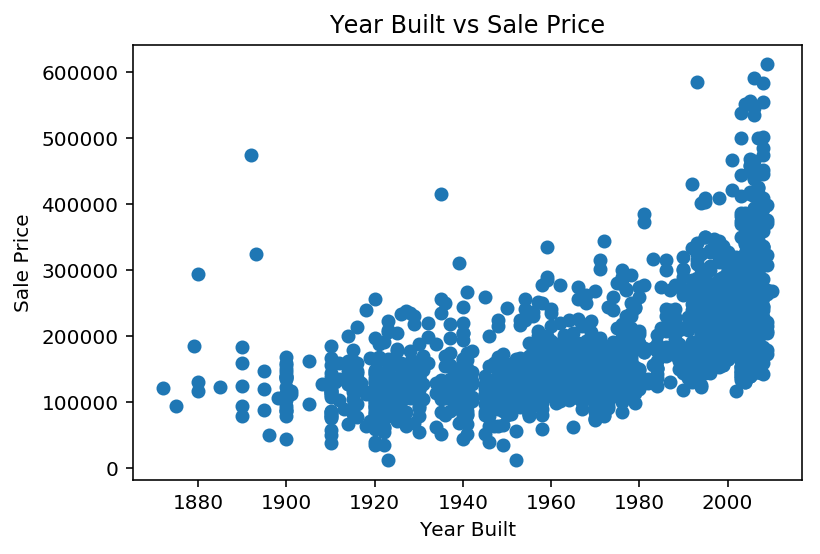

In [23]:
plt.scatter(ames_training_data['Year Built'],ames_training_data['SalePrice'])
plt.ylabel("Sale Price")
plt.xlabel("Year Built")
plt.title("Year Built vs Sale Price")

From plotting the Year Built vs the SalePrice, sale Price tends to go up the more recently a home has been built. 

Finally, since I have so many homes in my training data without miscellaneous features, I'd like to see if the homes that have them show a linear relationship in any way with Sales Price. 

Text(0.5, 1.0, 'Miscellanous Value vs Sale Price')

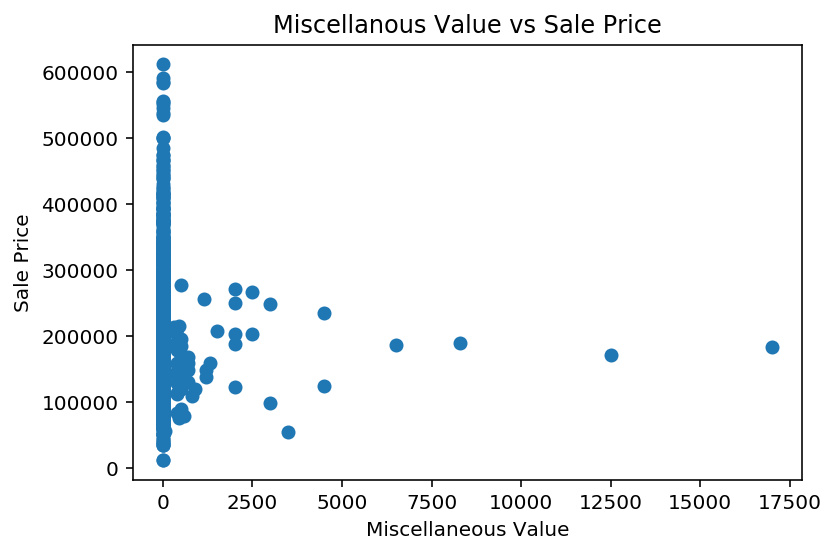

In [24]:
plt.scatter(ames_training_data['Misc Val'],ames_training_data['SalePrice'])
plt.ylabel("Sale Price")
plt.xlabel("Miscellaneous Value")
plt.title("Miscellanous Value vs Sale Price")

As we can tell from the cleaning above and from the scatterplot of the miscellaneous value, 1986 out of the 2051 values are 0, which means that roughly 97 percent of the homes in my training data do not have any miscellaneous features. 

# Now is time for scatterplots of the relevant categorical data.

Credit for catplot idea: Azam

First, I'd like to see what the distribution of each neighborhood with regards to Sale Price is. 

Text(0.5, 1.0, 'Neighborhood vs Sale Price')

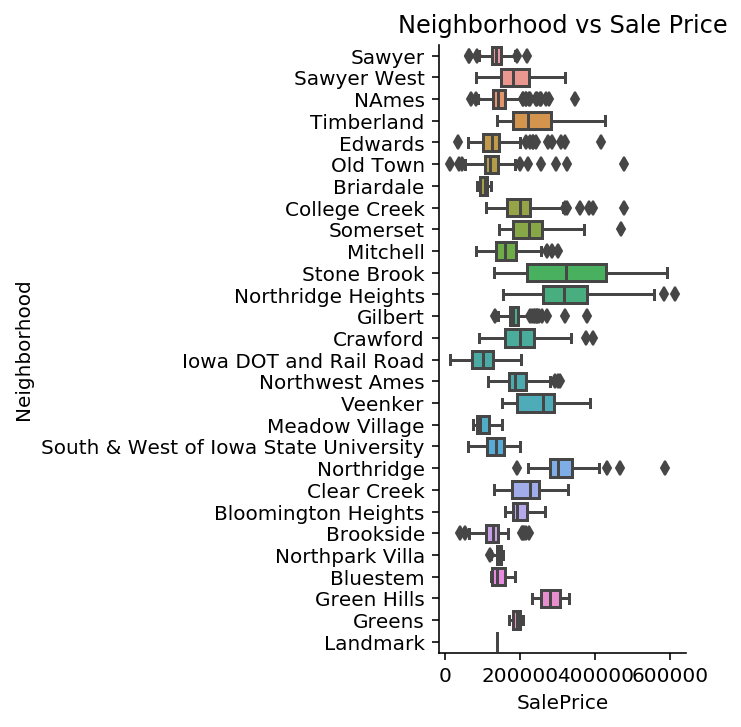

In [25]:
sns.catplot(x="SalePrice", y="Neighborhood", kind="box", data=ames_training_data) 
plt.title("Neighborhood vs Sale Price")

Northridge Heights, Northridge, and Stonebrook have the highest mean sale price. Meadow Village, Iowa DOT and Rail Road, and Briardale have some of the lowest mean sale prices. 

Next, I'd like to examine the relationship between home quality and sale price. 

Text(0.5, 1.0, 'Sale Price vs Overall Quality')

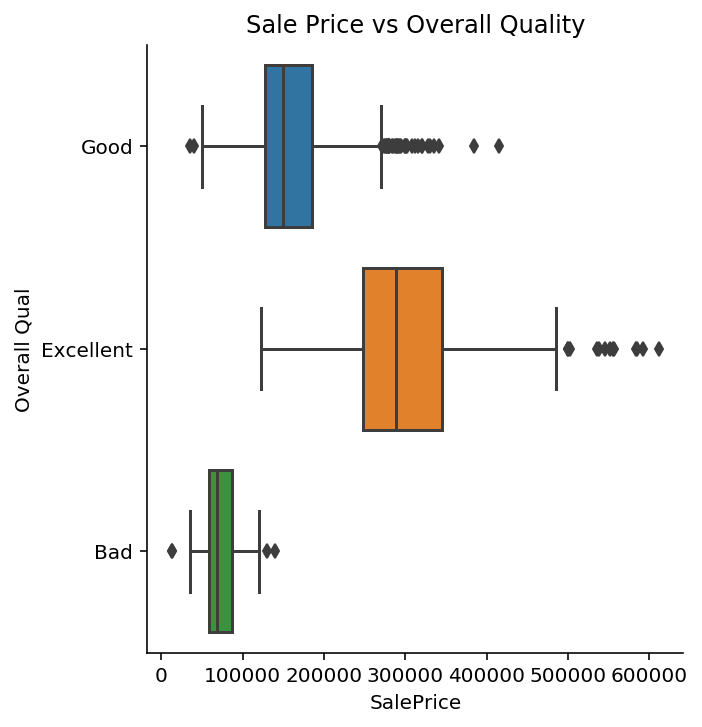

In [26]:
sns.catplot(x="SalePrice", y="Overall Qual", kind="box", data=ames_training_data);
plt.title("Sale Price vs Overall Quality")

The above plot shows that the better the home quality, the higher the Sale Price. Additionally, the average Sale Price of an Excellent home is roughly equal to the 75th percentile of Good home prices. 

Finally, I'd like to take a look about how a home is zoned affects how much it is sold for. 

Text(0.5, 1.0, 'Sale Price vs MS Zoning')

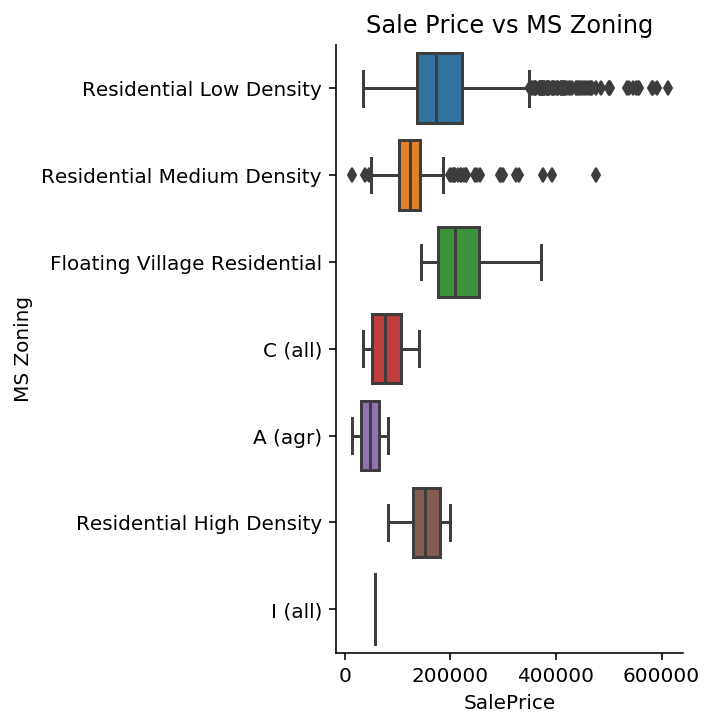

In [27]:
sns.catplot(x="SalePrice", y="MS Zoning", kind="box", data=ames_training_data);
plt.title("Sale Price vs MS Zoning")

Floating villages and low density residential homes have the highest average sale price.  

Floating village zoning information additional source: https://www.cityofames.org/home/showdocument?id=659

# Finally, we pickle the cleaned data to use in preprocessing. 

In [28]:
ames_training_data.to_pickle("../datasets/training_data_cleaned.pkl")